### **Recoleccion de datos**




In [38]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium
import branca.colormap as cm

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn import metrics

import json
import random
from datetime import datetime

%matplotlib inline

In [39]:
di_MXvideos = pd.read_csv('MXvideos_cc50_202101.csv')
di_MXcategories = pd.read_json('MX_category_id.json')

### **Descripcion de los datos**

In [40]:
di_MXvideos.info()
di_MXcategories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44043 entries, 0 to 44042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                43959 non-null  object 
 1   trending_date           40593 non-null  object 
 2   title                   40510 non-null  object 
 3   channel_title           40501 non-null  object 
 4   category_id             40451 non-null  float64
 5   publish_time            40451 non-null  object 
 6   tags                    40480 non-null  object 
 7   views                   40451 non-null  float64
 8   likes                   40451 non-null  float64
 9   dislikes                40451 non-null  float64
 10  comment_count           40451 non-null  float64
 11  thumbnail_link          40471 non-null  object 
 12  comments_disabled       40451 non-null  object 
 13  ratings_disabled        40451 non-null  object 
 14  video_error_or_removed  40451 non-null

In [41]:
di_MXvideos.nunique()

video_id                  34250
trending_date               272
title                     33821
channel_title              7005
category_id                  16
publish_time              29061
tags                      23647
views                     35915
likes                     14564
dislikes                   3693
comment_count              6310
thumbnail_link            33949
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               26727
state                        32
lat                          32
lon                          32
geometry                     32
dtype: int64

In [42]:
di_MXvideos.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24.0,13/11/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,FALSO,FALSO,FALSO,Disfruta la presencia del Chef Torreblanca en ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514)
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,13/11/2017 0:11,La Voz Mexico 7,104972.0,271.0,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,FALSO,FALSO,FALSO,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316)
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25.0,13/11/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,FALSO,FALSO,FALSO,La canción del principio se llama “Este espíri...,Guerrero,17.549974,-99.500010,POINT (-99.5000096 17.54997398)
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,12/11/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378.0,171.0,208.0,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,FALSO,FALSO,FALSO,El video es de un Walmart en el pais centroame...,Hidalgo,20.170434,-98.730031,POINT (-98.73003076000001 20.17043418)
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,13/11/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781.0,681.0,7428.0,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,FALSO,FALSO,FALSO,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Jalisco,19.770019,-104.369997,POINT (-104.3699966 19.77001935)


In [43]:
di_MXcategories.head(5)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [44]:
#Contabilizada en enteros
di_MXvideos.isna().sum().sort_values()

geometry                     0
lat                          0
state                        0
lon                          0
video_id                    84
trending_date             3450
title                     3533
channel_title             3542
tags                      3563
thumbnail_link            3572
publish_time              3592
views                     3592
likes                     3592
comment_count             3592
comments_disabled         3592
ratings_disabled          3592
video_error_or_removed    3592
category_id               3592
dislikes                  3592
description               7797
dtype: int64

In [45]:
#Contabilizada en porcentajes
(di_MXvideos.isna().sum().sort_values()/len(di_MXvideos))*100

geometry                   0.000000
lat                        0.000000
state                      0.000000
lon                        0.000000
video_id                   0.190723
trending_date              7.833254
title                      8.021706
channel_title              8.042141
tags                       8.089821
thumbnail_link             8.110256
publish_time               8.155666
views                      8.155666
likes                      8.155666
comment_count              8.155666
comments_disabled          8.155666
ratings_disabled           8.155666
video_error_or_removed     8.155666
category_id                8.155666
dislikes                   8.155666
description               17.703154
dtype: float64

<Axes: >

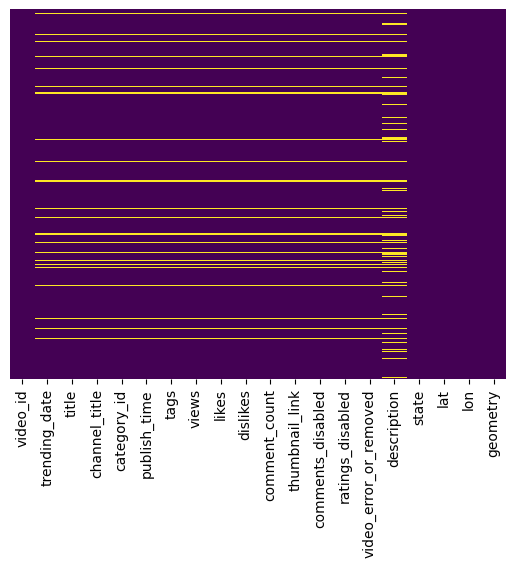

In [46]:
sns.heatmap(di_MXvideos.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
di_MX_videos_copy = di_MXvideos.copy()

In [48]:
di_MX_videos_copy.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
category_id               float64
publish_time               object
tags                       object
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
state                      object
lat                       float64
lon                       float64
geometry                   object
dtype: object

In [49]:
#Limpieza de datos
di_MX_videos_copy.drop('thumbnail_link', axis=1, inplace=True)
di_MX_videos_copy.sort_values(by='likes', ascending=False, inplace=True)
di_MX_videos_copy.drop_duplicates(subset='video_id', inplace=True)
di_MX_videos_copy.dropna(subset=['video_error_or_removed'], inplace=True)

categories_dict = {int(item['id']): item['snippet']['title'] for item in di_MXcategories['items']}
di_MX_videos_copy['category'] = di_MX_videos_copy['category_id'].map(categories_dict)

di_MX_videos_copy['comments_disabled'] = di_MX_videos_copy['comments_disabled'].map({'FALSO': 0, 'VERDADERO': 1})
di_MX_videos_copy['ratings_disabled'] = di_MX_videos_copy['ratings_disabled'].map({'FALSO': 0, 'VERDADERO': 1})
di_MX_videos_copy['video_error_or_removed'] = di_MX_videos_copy['video_error_or_removed'].map({'FALSO': 0, 'VERDADERO': 1})


In [50]:
(di_MX_videos_copy.isna().sum().sort_values()/len(di_MX_videos_copy))*100

video_id                   0.000000
lon                        0.000000
lat                        0.000000
state                      0.000000
video_error_or_removed     0.000000
ratings_disabled           0.000000
comments_disabled          0.000000
comment_count              0.000000
geometry                   0.000000
dislikes                   0.000000
views                      0.000000
tags                       0.000000
publish_time               0.000000
category_id                0.000000
channel_title              0.000000
title                      0.000000
trending_date              0.000000
likes                      0.000000
category                   0.626623
description               10.780891
dtype: float64

In [51]:
di_MX_videos_copy.reset_index(drop=True, inplace=True)

In [52]:
di_MX_videos_copy.isna().sum().sort_values()

video_id                     0
lon                          0
lat                          0
state                        0
video_error_or_removed       0
ratings_disabled             0
comments_disabled            0
comment_count                0
geometry                     0
dislikes                     0
views                        0
tags                         0
publish_time                 0
category_id                  0
channel_title                0
title                        0
trending_date                0
likes                        0
category                   210
description               3613
dtype: int64

In [53]:
di_MX_videos_copy.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,lat,lon
count,33513.000000,3.351300e+04,3.351300e+04,3.351300e+04,33513.000000,33513.000000,33513.000000,33513.000000,33513.000000,33513.000000
mean,21.068302,2.772275e+05,1.226102e+04,5.476183e+02,1561.655238,0.011279,0.016203,0.000507,21.469257,-100.240033
std,5.855823,1.403027e+06,6.548544e+04,8.301717e+03,10560.086922,0.105605,0.126256,0.022517,3.504024,6.014272
min,1.000000,1.570000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,16.429991,-116.009260
25%,22.000000,1.463500e+04,2.660000e+02,1.500000e+01,35.000000,0.000000,0.000000,0.000000,18.920381,-103.500024
50%,24.000000,4.697700e+04,1.052000e+03,5.100000e+01,161.000000,0.000000,0.000000,0.000000,20.379982,-99.669999
75%,24.000000,1.694540e+05,5.645000e+03,2.070000e+02,697.000000,0.000000,0.000000,0.000000,22.733353,-98.230010
max,43.000000,1.009124e+08,4.470923e+06,1.353667e+06,905925.000000,1.000000,1.000000,1.000000,30.764051,-86.711455


In [54]:
di_MX_videos_copy.nunique()

video_id                  33513
trending_date               205
title                     33205
channel_title              6922
category_id                  16
publish_time              28730
tags                      23234
views                     29838
likes                     11874
dislikes                   2936
comment_count              5080
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               26157
state                        32
lat                          32
lon                          32
geometry                     32
category                     15
dtype: int64

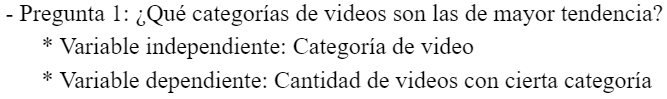

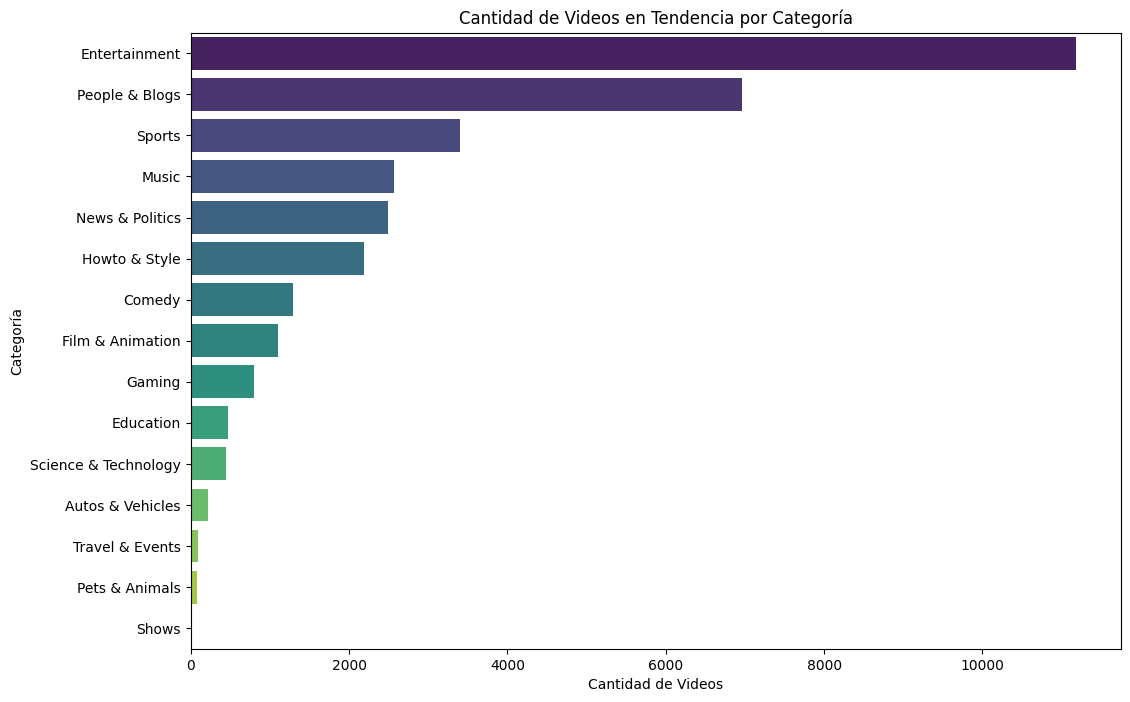

In [55]:
category_counts = di_MX_videos_copy['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Graficar las categorías más comunes usando seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='category', data=category_counts, palette='viridis', hue="category")
plt.title('Cantidad de Videos en Tendencia por Categoría')
plt.xlabel('Cantidad de Videos')
plt.ylabel('Categoría')
plt.show()

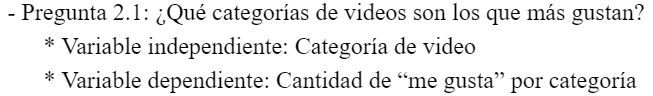

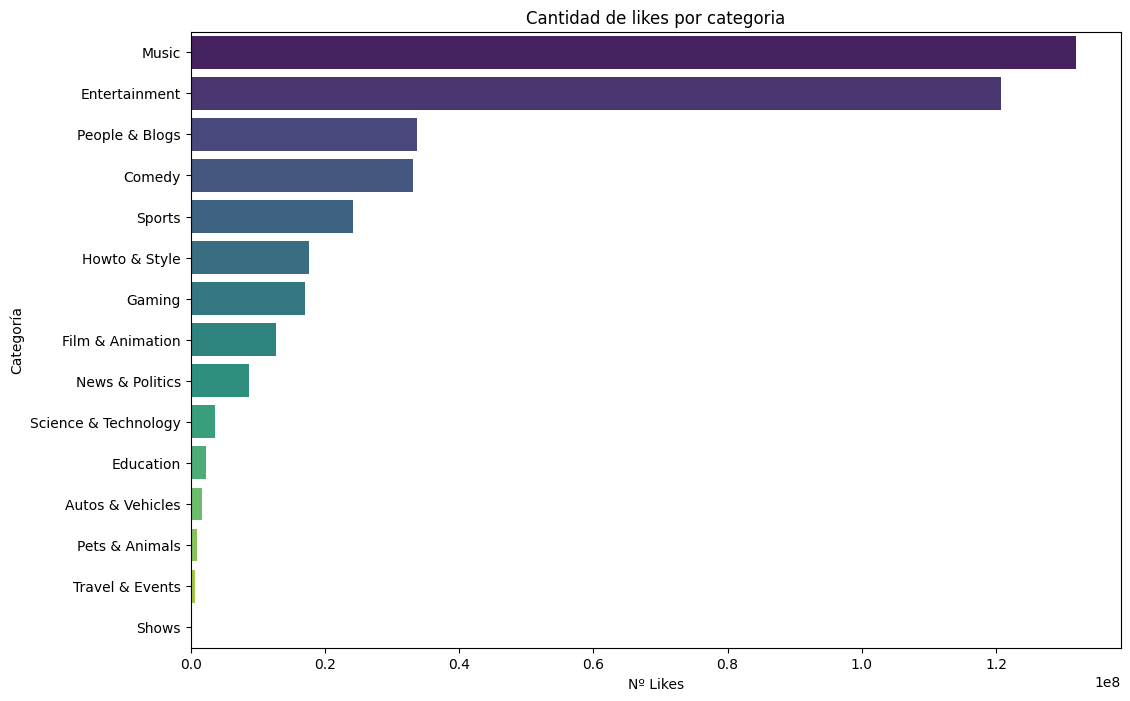

In [56]:
likes_by_category = di_MX_videos_copy.groupby('category').likes.sum().reset_index()
likes_by_category.sort_values(by="likes", ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='likes', y='category', data=likes_by_category, palette='viridis', hue="category")
plt.title('Cantidad de likes por categoria')
plt.xlabel('Nº Likes')
plt.ylabel('Categoría')
plt.show()

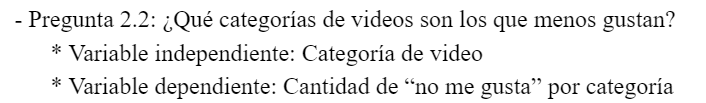

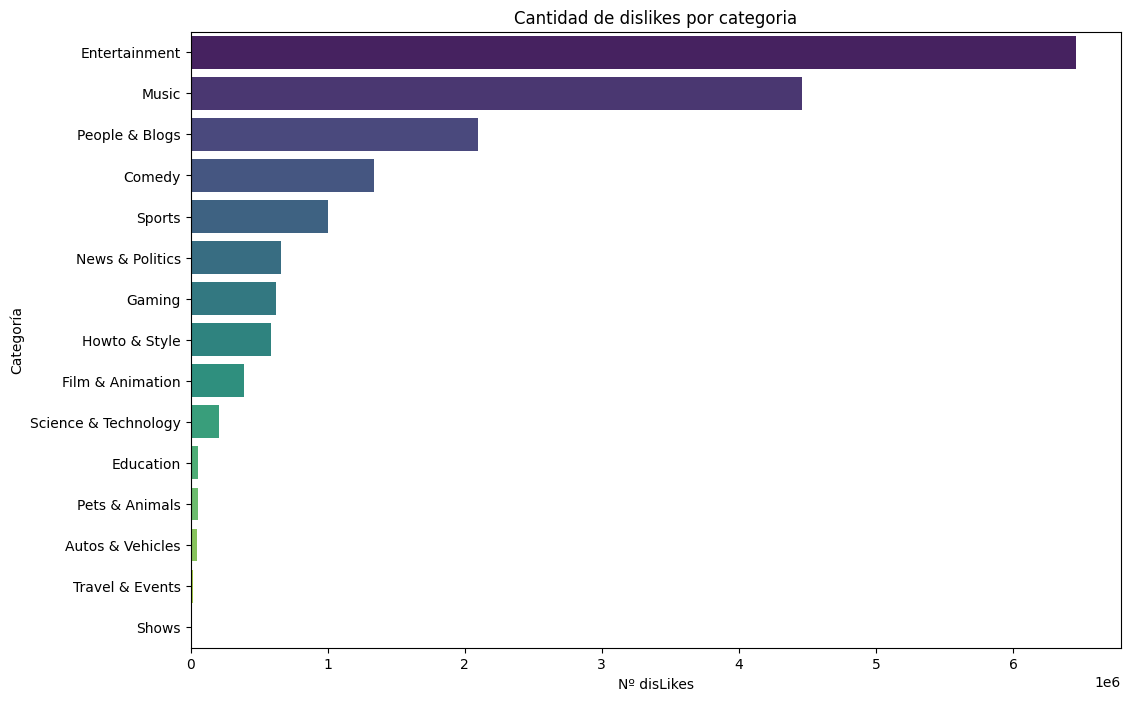

In [57]:
dislikes_by_category = di_MX_videos_copy.groupby('category').dislikes.sum().reset_index()
dislikes_by_category.sort_values(by="dislikes", ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='dislikes', y='category', data=dislikes_by_category, palette='viridis', hue="category")
plt.title('Cantidad de dislikes por categoria')
plt.xlabel('Nº disLikes')
plt.ylabel('Categoría')
plt.show()

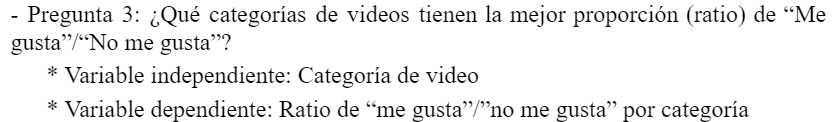

category
Education               42.471947
Autos & Vehicles        36.935910
Film & Animation        33.008021
Travel & Events         32.371714
Howto & Style           30.017094
Music                   29.575698
Gaming                  27.274504
Comedy                  24.851914
Sports                  24.081572
Entertainment           18.690815
Science & Technology    17.766091
Pets & Animals          17.434662
People & Blogs          16.074480
News & Politics         13.215614
Shows                    5.395604
Name: ratio_likes_dislikes, dtype: float64


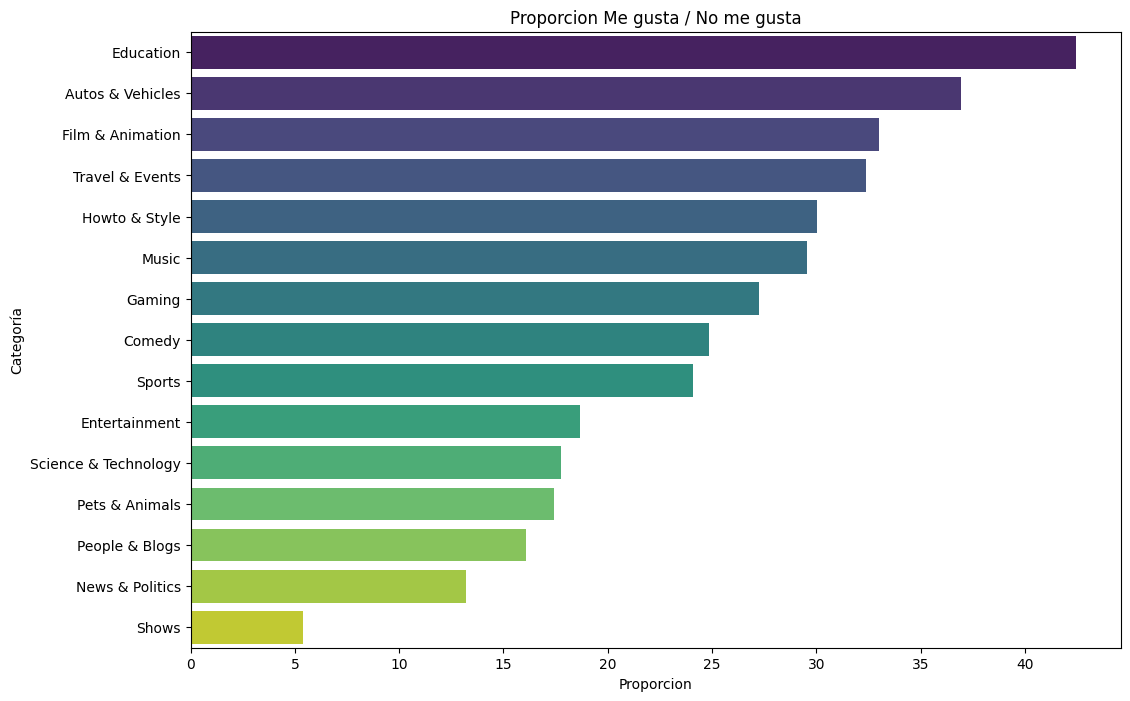

In [58]:
likes_dislikes_by_category = di_MX_videos_copy.groupby('category')[['likes', 'dislikes']].sum()
likes_dislikes_by_category['ratio_likes_dislikes']=likes_dislikes_by_category['likes'] / likes_dislikes_by_category['dislikes']

likes_dislikes_by_category.sort_values(by='ratio_likes_dislikes', ascending=False, inplace=True)
print(likes_dislikes_by_category['ratio_likes_dislikes'])

plt.figure(figsize=(12, 8))
sns.barplot(x='ratio_likes_dislikes', y='category', data=likes_dislikes_by_category, palette='viridis', hue="category")
plt.title('Proporcion Me gusta / No me gusta')
plt.xlabel('Proporcion')
plt.ylabel('Categoría')
plt.show()

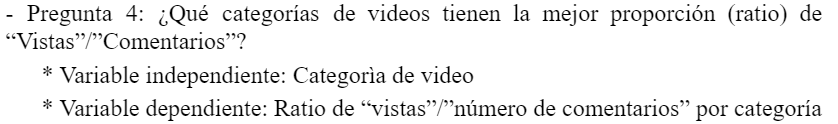

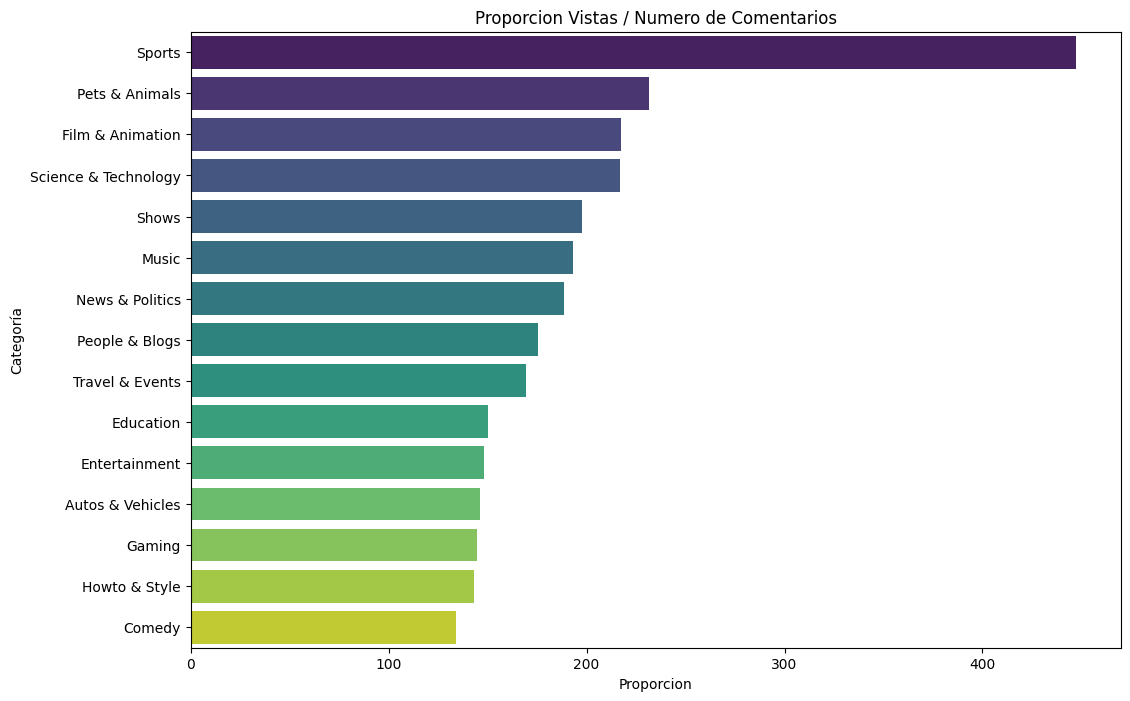

In [59]:
views_commentcount_by_category = di_MX_videos_copy.groupby('category')[['views', 'comment_count']].sum()
views_commentcount_by_category['ratio_views_commentcount']=views_commentcount_by_category['views'] / views_commentcount_by_category['comment_count']
views_commentcount_by_category.sort_values(by='ratio_views_commentcount', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='ratio_views_commentcount', y='category', data=views_commentcount_by_category, palette='viridis', hue="category")
plt.title('Proporcion Vistas / Numero de Comentarios')
plt.xlabel('Proporcion')
plt.ylabel('Categoría')
plt.show()

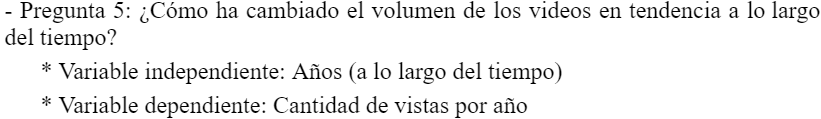

In [60]:
# Creamos una copia del dataset original, agrupando por fecha y sumando las vistas
volumen_por_año = di_MX_videos_copy.groupby('trending_date')['views'].sum().reset_index()

# Funcion para convertir la fecha en el formato correcto
def convertir_fecha(fecha):
    fecha_parts = fecha.split('.')
    if len(fecha_parts) == 3:
        yy, dd, mm = fecha_parts
        return f'20{yy}-{mm}-{dd}'
    else:
        return fecha

# Aplicamos la funcion a la columna trending_date
volumen_por_año['trending_date'] = volumen_por_año['trending_date'].apply(lambda x: convertir_fecha(x))

# Convertimos la columna trending_date a datetime, ignorando los errores
volumen_por_año['trending_date'] = pd.to_datetime(volumen_por_año['trending_date'], errors='coerce')
volumen_por_año.dropna(subset=['trending_date'], inplace=True)
volumen_por_año = volumen_por_año.sort_values('trending_date')

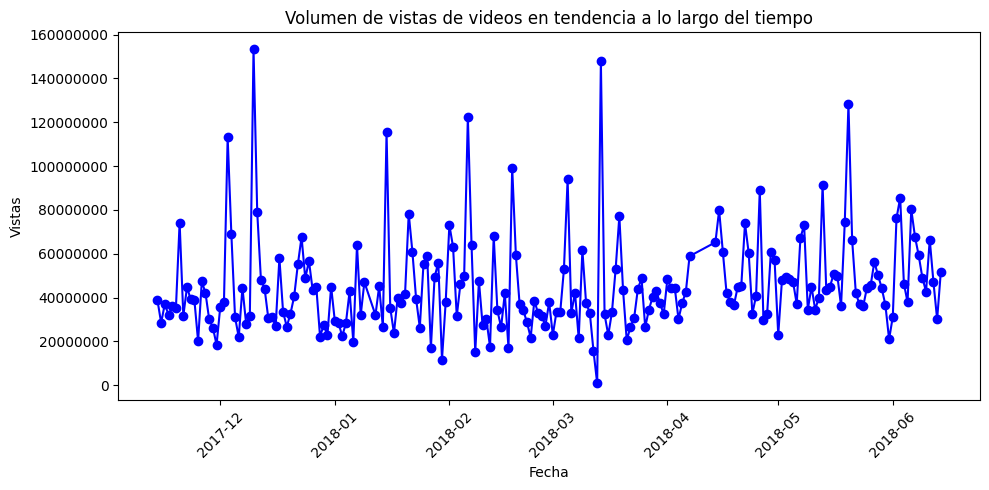

In [61]:
# Graficamos el volumen de vistas a lo largo del tiempo
plt.figure(figsize=(10, 5))
plt.plot(volumen_por_año['trending_date'], volumen_por_año['views'], marker='o', linestyle='-', color='b')
plt.title('Volumen de vistas de videos en tendencia a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Vistas')
# Configuramos el formato de las etiquetas del eje Y para usar valores numéricos en lugar de notación científica
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

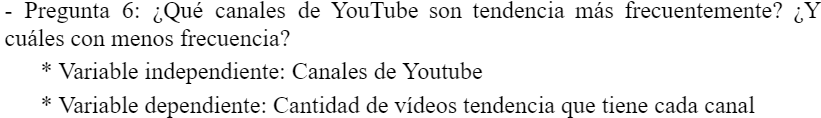

In [62]:
# Agrupamos por el nombre del canal y contamos cuantas veces aparece en el dataset
canales_frecuentes = di_MX_videos_copy['channel_title'].value_counts().reset_index()
canales_frecuentes.columns = ['channel_title', 'frecuencia']
canales_frecuentes = canales_frecuentes.sort_values(by='frecuencia', ascending=False)

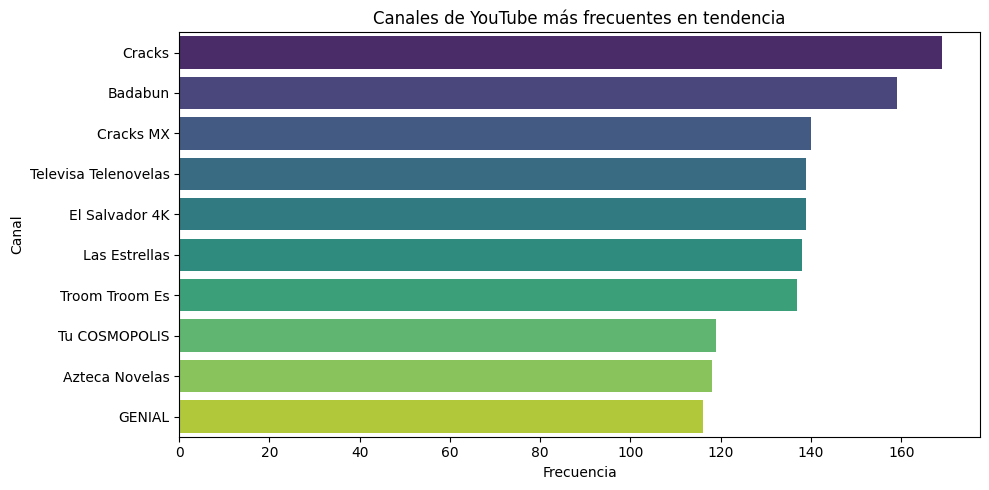

In [63]:
# Graficamos los canales más frecuentes
plt.figure(figsize=(10, 5))
sns.barplot(x='frecuencia', y='channel_title', data=canales_frecuentes.head(10), palette='viridis', hue="channel_title")
plt.title('Canales de YouTube más frecuentes en tendencia')
plt.xlabel('Frecuencia')
plt.ylabel('Canal')
plt.tight_layout()
plt.show()

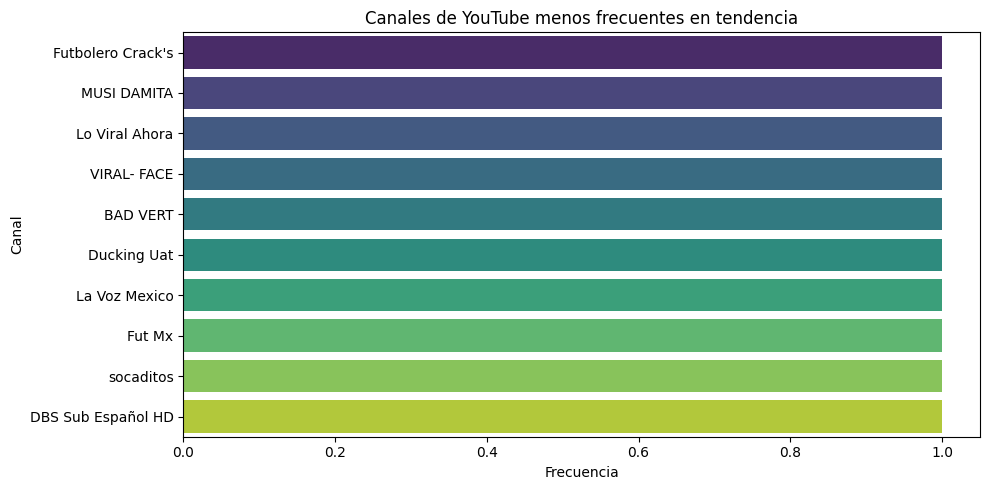

In [64]:
# Graficamos los canales menos frecuentes
plt.figure(figsize=(10, 5))
sns.barplot(x='frecuencia', y='channel_title', data=canales_frecuentes.tail(10), palette='viridis', hue="channel_title")
plt.title('Canales de YouTube menos frecuentes en tendencia')
plt.xlabel('Frecuencia')
plt.ylabel('Canal')
plt.tight_layout()
plt.show()

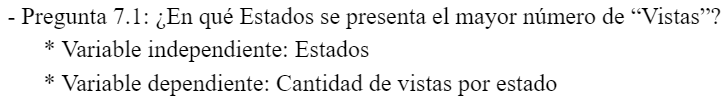

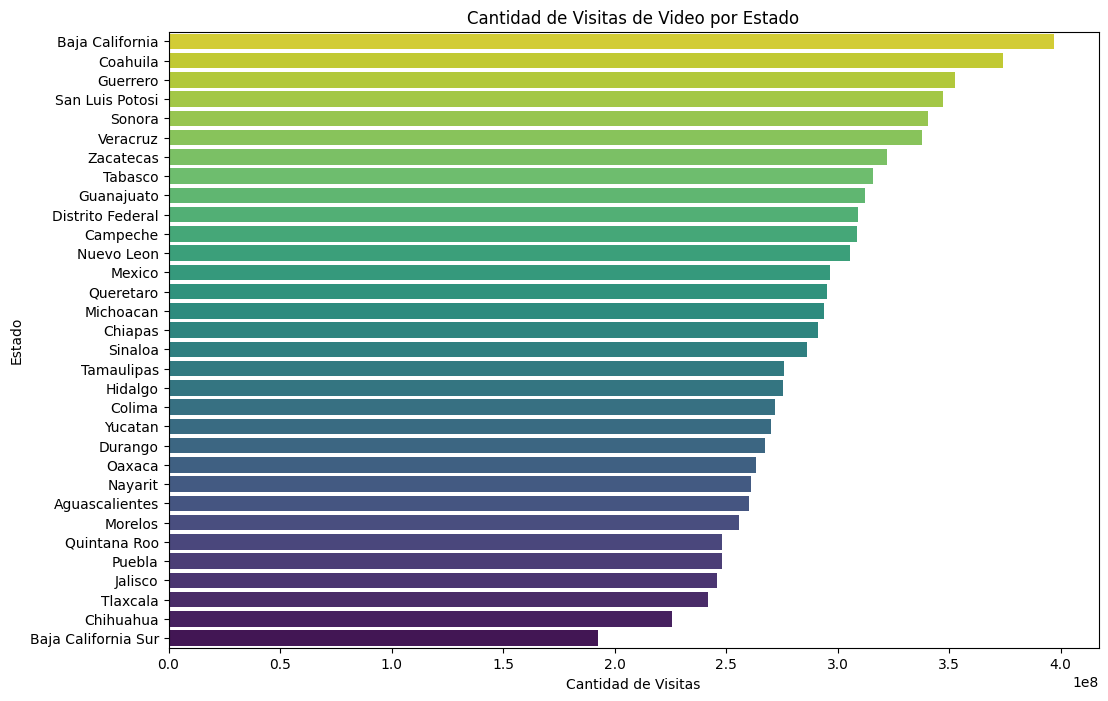

In [65]:
visits_by_state = di_MX_videos_copy.groupby('state')['views'].sum().reset_index()
visits_by_state.sort_values(by='views', inplace=True, ascending=False)

custom_palette = sns.color_palette("viridis", len(visits_by_state))[::-1]

# Visualizar en un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='views', y='state', data=visits_by_state, palette=custom_palette, hue="state")
plt.title('Cantidad de Visitas de Video por Estado')
plt.xlabel('Cantidad de Visitas')
plt.ylabel('Estado')
plt.show()


In [66]:
temp = pd.DataFrame(di_MX_videos_copy)
# Convertir la columna de texto 'geometry' en objetos shapely.geometry.Point
temp['geometry'] = temp['geometry'].apply(lambda x: Point(map(float, x.strip('POINT ()').split())))

# Crear el GeoDataFrame
gdf = gpd.GeoDataFrame(temp, geometry='geometry')

centroides = gdf.groupby('state').geometry.apply(lambda x: x.unary_union.centroid)

# Calcular la suma de likes en cada estado
vistas_por_estado = gdf.groupby('state').views.sum().reset_index(name='total_views')

# Combinar los centroides y la cantidad de likes por estado
centroides_gdf = gpd.GeoDataFrame(geometry=centroides.values, crs=gdf.crs)
centroides_gdf['state'] = centroides.index
centroides_gdf = centroides_gdf.merge(vistas_por_estado, on='state')

# Normalizar los likes para asignar colores
max_likes = centroides_gdf['total_views'].max()
min_likes = centroides_gdf['total_views'].min()
centroides_gdf['color'] = centroides_gdf['total_views']

# Calcular las coordenadas medias para centrar el mapa
mean_lat = centroides_gdf.geometry.y.mean()
mean_lon = centroides_gdf.geometry.x.mean()

# Crear un mapa de folium centrado en las coordenadas medias
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

# Añadir los puntos de los centroides al mapa con colores escalados según los likes
colormap = cm.LinearColormap(colors=['#0000FF', '#880088', '#FF0000', '#FF8800', '#FFFF00'], vmin=0, vmax=max_likes)
for _, row in centroides_gdf.iterrows():
    color =  colormap(row["color"])#f'hsl({int(row["color"] * 60)}, 100%, 50%)'  # Escalar el color del punto según los likes
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=10,
        popup=f"{row['state']}: {int(row['total_views'])} views",
        fill=True,
        color=color,
        fill_opacity=0.7
    ).add_to(m)
m.add_child(colormap)
m

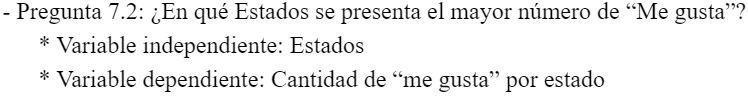

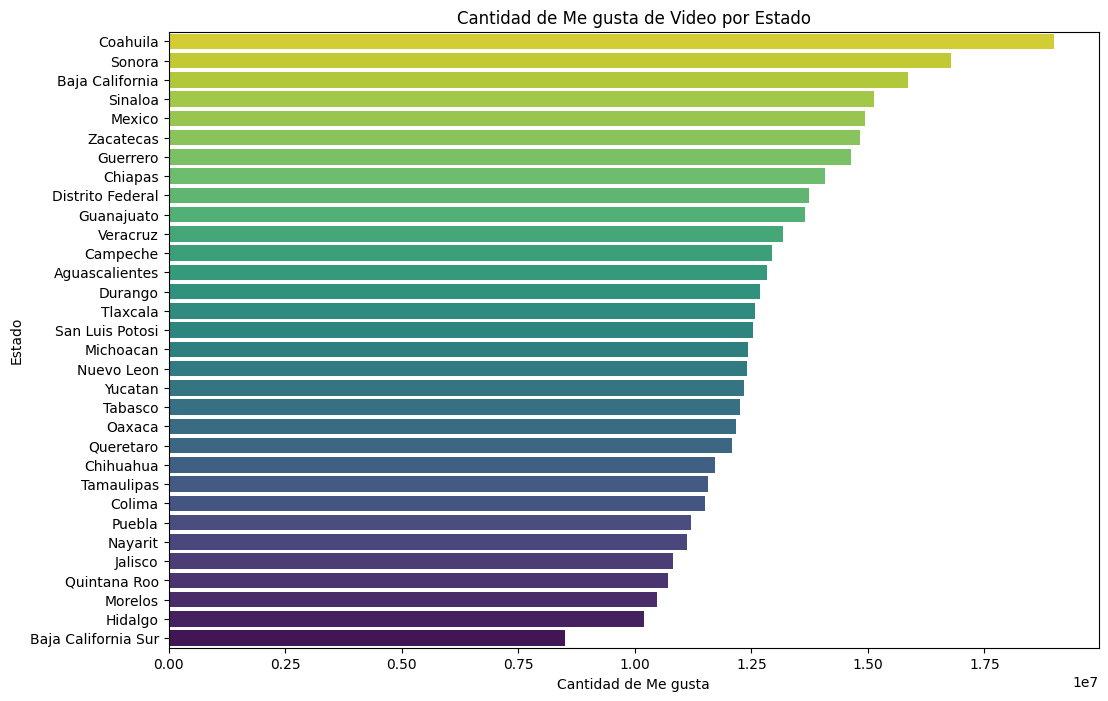

In [67]:
likes_by_state = di_MX_videos_copy.groupby('state')['likes'].sum().reset_index()
likes_by_state.sort_values(by='likes', inplace=True, ascending=False)

custom_palette = sns.color_palette("viridis", len(likes_by_state))[::-1]

# Visualizar en un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='likes', y='state', data=likes_by_state, palette=custom_palette, hue="state")
plt.title('Cantidad de Me gusta de Video por Estado')
plt.xlabel('Cantidad de Me gusta')
plt.ylabel('Estado')
plt.show()

In [68]:
# Calcular la suma de likes en cada estado
likes_por_estado = gdf.groupby('state').likes.sum().reset_index(name='total_likes')

# Combinar los centroides y la cantidad de likes por estado
centroides_gdf = gpd.GeoDataFrame(geometry=centroides.values, crs=gdf.crs)
centroides_gdf['state'] = centroides.index
centroides_gdf = centroides_gdf.merge(likes_por_estado, on='state')

# Normalizar los likes para asignar colores
max_likes = centroides_gdf['total_likes'].max()
min_likes = centroides_gdf['total_likes'].min()
centroides_gdf['color'] = centroides_gdf['total_likes']

# Calcular las coordenadas medias para centrar el mapa
mean_lat = centroides_gdf.geometry.y.mean()
mean_lon = centroides_gdf.geometry.x.mean()

# Crear un mapa de folium centrado en las coordenadas medias
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

# Añadir los puntos de los centroides al mapa con colores escalados según los likes
colormap = cm.LinearColormap(colors=['#0000FF', '#880088', '#FF0000', '#FF8800', '#FFFF00'], vmin=0, vmax=max_likes)
for _, row in centroides_gdf.iterrows():
    color =  colormap(row["color"])#f'hsl({int(row["color"] * 60)}, 100%, 50%)'  # Escalar el color del punto según los likes
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=10,
        popup=f"{row['state']}: {int(row['total_likes'])} likes",
        fill=True,
        color=color,
        fill_opacity=0.7
    ).add_to(m)
m.add_child(colormap)
m

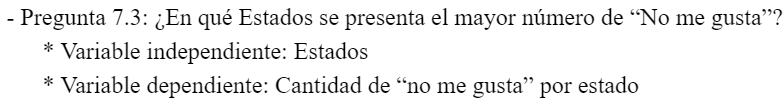

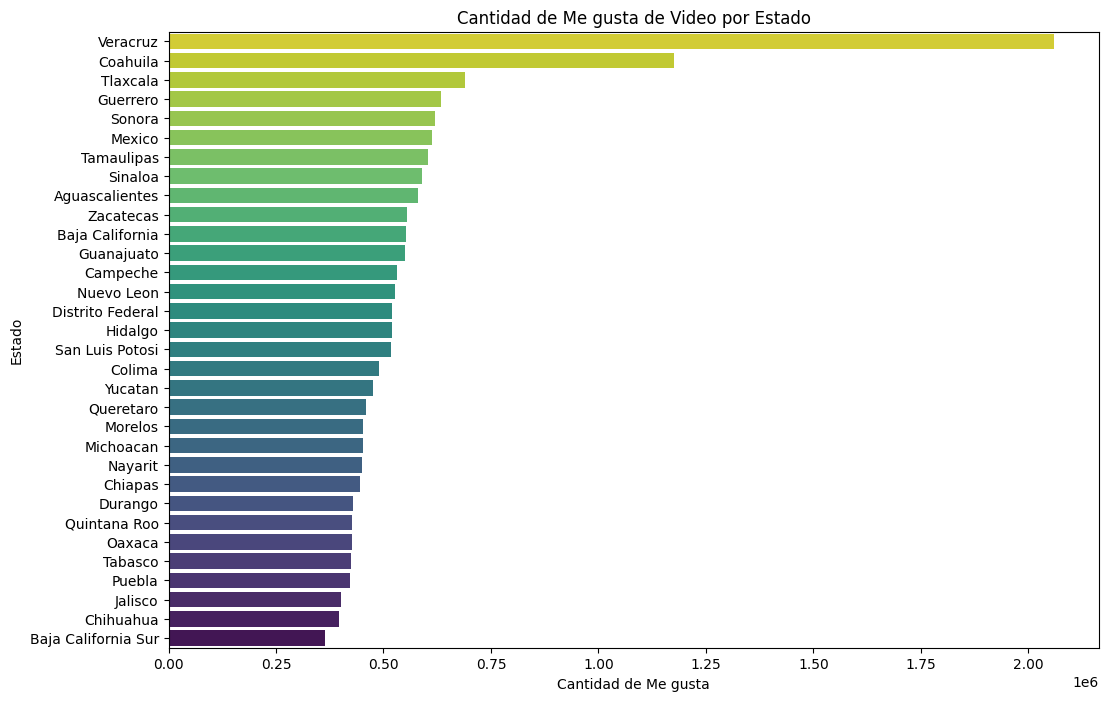

In [69]:
dislikes_by_state = di_MX_videos_copy.groupby('state')['dislikes'].sum().reset_index()
dislikes_by_state.sort_values(by='dislikes', inplace=True, ascending=False)

custom_palette = sns.color_palette("viridis", len(dislikes_by_state))[::-1]

# Visualizar en un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='dislikes', y='state', data=dislikes_by_state, palette=custom_palette, hue="state")
plt.title('Cantidad de Me gusta de Video por Estado')
plt.xlabel('Cantidad de Me gusta')
plt.ylabel('Estado')
plt.show()

In [70]:
# Calcular la suma de likes en cada estado
dislikes_por_estado = gdf.groupby('state').dislikes.sum().reset_index(name='total_dislikes')

# Combinar los centroides y la cantidad de likes por estado
centroides_gdf = gpd.GeoDataFrame(geometry=centroides.values, crs=gdf.crs)
centroides_gdf['state'] = centroides.index
centroides_gdf = centroides_gdf.merge(dislikes_por_estado, on='state')

# Normalizar los likes para asignar colores
max_likes = centroides_gdf['total_dislikes'].max()
min_likes = centroides_gdf['total_dislikes'].min()
centroides_gdf['color'] = centroides_gdf['total_dislikes']

# Calcular las coordenadas medias para centrar el mapa
mean_lat = centroides_gdf.geometry.y.mean()
mean_lon = centroides_gdf.geometry.x.mean()

# Crear un mapa de folium centrado en las coordenadas medias
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

# Añadir los puntos de los centroides al mapa con colores escalados según los likes
colormap = cm.LinearColormap(colors=['#0000FF', '#880088', '#FF0000', '#FF8800', '#FFFF00'], vmin=0, vmax=max_likes)
for _, row in centroides_gdf.iterrows():
    color =  colormap(row["color"])#f'hsl({int(row["color"] * 60)}, 100%, 50%)'  # Escalar el color del punto según los likes
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=10,
        popup=f"{row['state']}: {int(row['total_dislikes'])} dislikes",
        fill=True,
        color=color,
        fill_opacity=0.7
    ).add_to(m)
m.add_child(colormap)
m

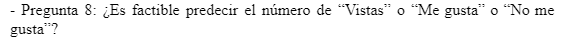

### **Modelo con regresion lineal**

In [71]:
def MAE(y_t, y_p):
    res = 0
    for i in range(len(y_t)):
        res += abs(y_t.iloc[i] - y_p[i])
    res /= len(y_t)
    return res

def MSE(y_t, y_p):
    res = 0
    for i in range(len(y_t)):
        res += pow((y_t.iloc[i] - y_p[i]), 2)
    res /= len(y_t)
    return res

def RMSE(y_t, y_p):
    res = 0
    for i in range(len(y_t)):
        res += pow((y_t.iloc[i] - y_p[i]), 2)
    res /= len(y_t)
    res = pow(res, 1/2)
    return res

In [72]:
traindb = di_MX_videos_copy

In [73]:
traindb = traindb[(traindb['ratings_disabled'] != 1)]
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Seleccionar las columnas numéricas y eliminar las no deseadas
numeric_columns = traindb.select_dtypes(include=[np.number]).drop(["video_error_or_removed", "ratings_disabled", "comments_disabled", "category_id", "lat", "lon"], axis=1).columns

# Reemplazar outliers en todas las columnas numéricas con la mediana
for column in numeric_columns:
    traindb = replace_outliers_with_median(traindb, column)

MAE: 444.1072168876125
MSE: 524721.9401645331
RMSE: 724.3769323801891


,Coeficiente
category_id,-8.772542
views,0.001285
dislikes,3.152861
comment_count,5.751076
comments_disabled,622.268902
ratings_disabled,0.000000


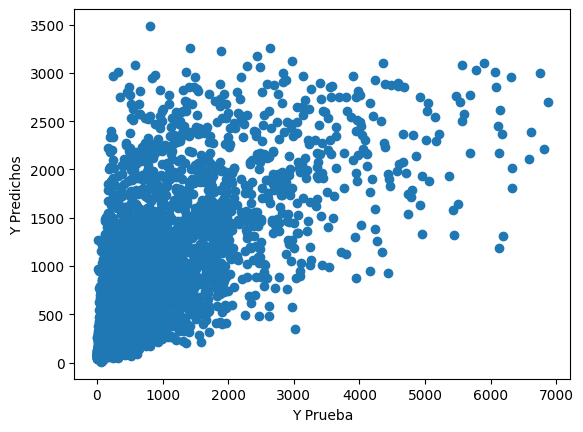

In [74]:
# Modelo para predecir visitas
x = traindb.select_dtypes(include=[np.number]).drop(["likes", "lat", "lon", "video_error_or_removed"], axis=1)
y = traindb['likes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Prueba')
plt.ylabel('Y Predichos')

print("MAE:", MAE(y_test,predictions))
print("MSE:", MSE(y_test,predictions))
print("RMSE:", RMSE(y_test,predictions))

lr.coef_ = pd.DataFrame(lr.coef_,x.columns,columns=['Coeficiente'])
lr.coef_

MAE: 444.1072168876125
MSE: 524721.9401645331
RMSE: 724.3769323801891


,Coeficiente
category_id,-8.772542
views,0.001285
dislikes,3.152861
comment_count,5.751076
comments_disabled,622.268902
ratings_disabled,0.000000


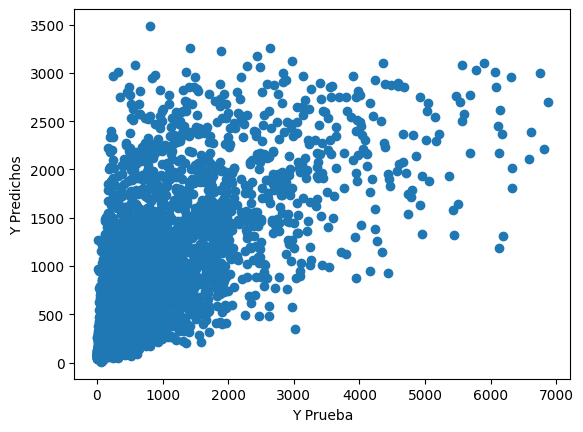

In [75]:
# Modelo para predecir likes
x = traindb.select_dtypes(include=[np.number]).drop(["likes", "lat", "lon", "video_error_or_removed"], axis=1)
y = traindb['likes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Prueba')
plt.ylabel('Y Predichos')

print("MAE:", MAE(y_test,predictions))
print("MSE:", MSE(y_test,predictions))
print("RMSE:", RMSE(y_test,predictions))

lr.coef_ = pd.DataFrame(lr.coef_,x.columns,columns=['Coeficiente'])
lr.coef_

MAE: 15.92625950911678
MSE: 537.3274420623169
RMSE: 23.180324459815417


,Coeficiente
category_id,0.247918
views,0.000431
likes,0.003298
comment_count,0.076255
comments_disabled,8.704276
ratings_disabled,0.000000


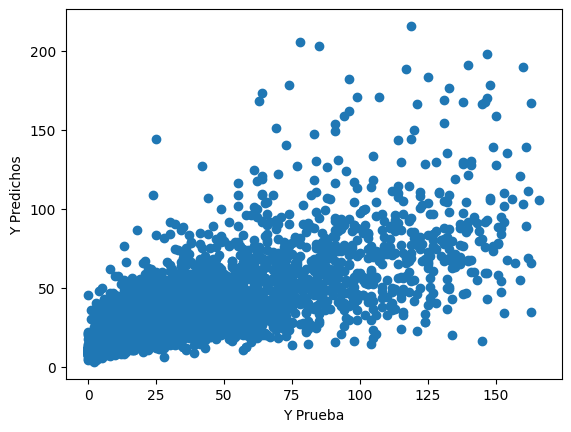

In [76]:
# Modelo para predecir dislikes
x = traindb.select_dtypes(include=[np.number]).drop(["dislikes", "lat", "lon", "video_error_or_removed"], axis=1)
y = traindb['dislikes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Prueba')
plt.ylabel('Y Predichos')

print("MAE:", MAE(y_test,predictions))
print("MSE:", MSE(y_test,predictions))
print("RMSE:", RMSE(y_test,predictions))

lr.coef_ = pd.DataFrame(lr.coef_,x.columns,columns=['Coeficiente'])
lr.coef_

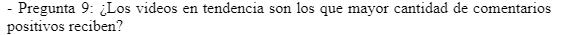

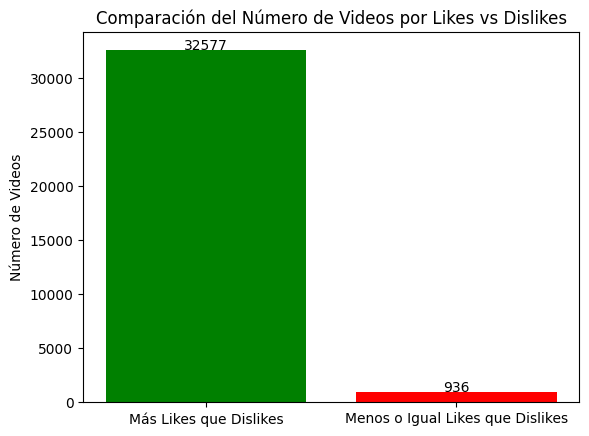

In [77]:
videos_mas_likes_que_dislikes = di_MX_videos_copy[di_MX_videos_copy['likes'] > di_MX_videos_copy['dislikes']]
videos_menos_o_igual_likes_que_dislikes = di_MX_videos_copy[di_MX_videos_copy['likes'] <= di_MX_videos_copy['dislikes']]

labels = ['Más Likes que Dislikes', 'Menos o Igual Likes que Dislikes']
counts = [videos_mas_likes_que_dislikes.shape[0], videos_menos_o_igual_likes_que_dislikes.shape[0]]

fig, ax = plt.subplots()
ax.bar(labels, counts, color=['green', 'red'])
ax.set_ylabel('Número de Videos')
ax.set_title('Comparación del Número de Videos por Likes vs Dislikes')

for i, v in enumerate(counts):
    ax.text(i, v + 50, str(v), ha='center')

plt.show()

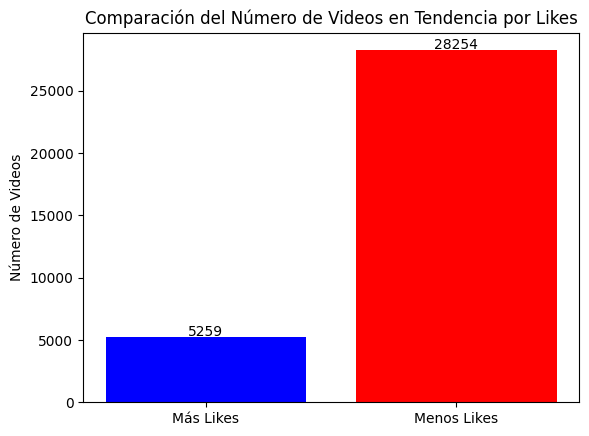

In [78]:
media_likes_total = di_MX_videos_copy['likes'].mean()
videos_mas_likes = di_MX_videos_copy[di_MX_videos_copy['likes'] > media_likes_total]
videos_menos_likes = di_MX_videos_copy[di_MX_videos_copy['likes'] <= media_likes_total]

labels = ['Más Likes', 'Menos Likes']
counts = [videos_mas_likes.shape[0], videos_menos_likes.shape[0]]

fig, ax = plt.subplots()
ax.bar(labels, counts, color=['blue', 'red'])
ax.set_ylabel('Número de Videos')
ax.set_title('Comparación del Número de Videos en Tendencia por Likes')

for i, v in enumerate(counts):
    ax.text(i, v + 100, str(v), ha='center')

plt.show()
